## **1. Generating random numbers**

In [23]:
import numpy as np
import numpy.random as rnd


The `randint(low, high, size)` function returns an array consisting of `size` integers, each is drawn randomly from low up to, but not including, high.

In [24]:
print(rnd.randint(0,1 + 10,10))

[ 7  2  8  6  7  4  6 10 10  8]


#### 

the value of the seed defines the sequence of random numbers that you get

In [25]:
rnd.seed(10)
print(rnd.randint(0, 1 + 1, 10))

[1 1 0 1 0 1 1 0 1 1]


### draw random numbers from a given array using the choice() function

`rnd.choice(array, size, replace)`

In [26]:
size = 3
arr = np.arange(1,11)
print("The given array:", arr)
pick = rnd.choice(arr, size, replace = True)
print("\nPick " + str(size) + " random numbers form the array: ",pick)

The given array: [ 1  2  3  4  5  6  7  8  9 10]

Pick 3 random numbers form the array:  [1 2 9]


## **2. Flipping Coins**

let's flip a coin 100 times and count the number of heads, denoted by 0, and the number of tails, denoted by 1. 

In [27]:
flips = rnd.randint(0, 1+1, 100)
headCount = 0
tailCount = 1
for i in range(100):
    if flips[i] == 0:
        headCount += 1
    else:
        tailCount += 1
print('number of heads = ', headCount)
print('number of tails = ', tailCount)
            

number of heads =  59
number of tails =  42


In [28]:
flips = rnd.randint(0, 1+1, 100)
headCount = len(flips[flips == 0])
tailCount = len(flips[flips == 1])

print('number of heads = ', headCount)
print('number of tails = ', tailCount)

number of heads =  47
number of tails =  53


In [29]:
n = 3    # number of outcomes
outcomes = np.zeros(n, dtype='int') # Two outcomes. heads are stored in outcome[0], tails in outcome[1]
flips = rnd.randint(0, n, 100)

for i in range (n):
    outcomes[i] = len(flips[flips == i])    # stores the length of of each outcome in outcomes
    print('outcome ', i, ' is ', outcomes[i])

outcome  0  is  32
outcome  1  is  33
outcome  2  is  35


`axis = 0` sums over index 0 of the array (along the rows), `axis = 1` sums over the index 1 of the array (along the columns)

In [30]:
rnd.seed(55)    # to make sure the output of rnd is consistent
flips = rnd.randint(low=0, high=1+1, size=(2, 100)) # random array of dimensions 2 x 100
tails = np.sum(flips, axis=0)
number_of_tails = np.zeros(3, dtype='int')

for i in range(3):
    number_of_tails[i] = np.count_nonzero(tails == i)

print('number of 0 tails:', number_of_tails[0])
print('number of 1 tail:', number_of_tails[1])
print('number of 2 tails:', number_of_tails[2])

number of 0 tails: 27
number of 1 tail: 47
number of 2 tails: 26


### Plotting Results

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0,0.5,'Occurance in 100 trails')

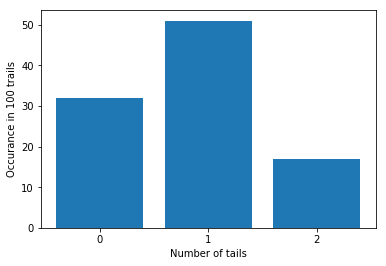

In [32]:
# two coin flips with 100 trails

flips = rnd.randint(low = 0, high = 1+1, size = (2, 100)) 
# add up each trail from the two flips
tails = np.sum(flips, axis = 0)
# sum = 0, 1, or, 2
numTails = np.zeros(3, dtype = 'int')
for i in range(3):
    numTails[i] = np.count_nonzero(tails == i)
    
fig, ax = plt.subplots()
ax.bar(range(0,3), numTails)
ax.set_xticks(range(0,3))
ax.set_xlabel('Number of tails')
ax.set_ylabel('Occurance in 100 trails')

### Cumulative probability


Cumulative prob [0.33 0.72 1.  ]


Text(0,0.5,'Cumulative probability')

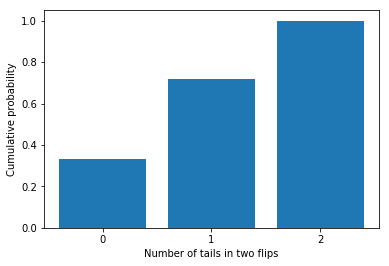

In [33]:
flips = rnd.randint(low = 0, high = 1+1, size = (2, 100)) 
# add up each trail from the two flips
tails = np.sum(flips, axis = 0)
# sum = 0, 1, or, 2
numTails = np.zeros(3, dtype = 'int')
for i in range(3):
    numTails[i] = np.count_nonzero(tails == i)
    
prob = numTails/100
cum_prob = np.cumsum(prob)
print('Cumulative prob', cum_prob)

fig, ax = plt.subplots()
# cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
ax.bar(range(0,3), cum_prob)
ax.set_xticks(range(0,3))
ax.set_xlabel('Number of tails in two flips')
ax.set_ylabel('Cumulative probability')

## **3. Bernoulli Variable**

### 

flip a coin five times in a row and record how many times we obtain tails (varying from 0-5).

probabilities [0.027 0.154 0.329 0.312 0.149 0.029]
Cumulative prob [0.027 0.181 0.51  0.822 0.971 1.   ]


Text(0,0.5,'Cumulative probability')

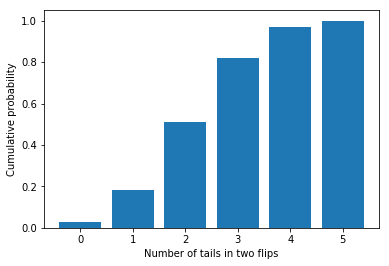

In [34]:
N_coin = 5
N = 1000
flips = rnd.randint(low = 0, high = 1+1, size = (N_coin, N)) 
tails = np.sum(flips, axis = 0)

numTails = np.zeros(6, dtype = 'int')
for i in range(6):
    numTails[i] = np.count_nonzero(tails == i)
    
prob = numTails/N
cum_prob = np.cumsum(prob)
print('probabilities', prob)
print('Cumulative prob', cum_prob)

fig, ax = plt.subplots()
# cum_prob[0] = prob[0], cum_prob[1] = prob[0] + prob[1], etc.
ax.bar(range(0,6), cum_prob)
ax.set_xticks(range(0,6))
ax.set_xlabel('Number of tails in two flips')
ax.set_ylabel('Cumulative probability')

###  probability of a Bernouli variable


$$p = P(Y = 1)$$

$$ P(X = k) = \left(\!\begin{array}{c} n \\ k \end{array}\!\right)p^k(1 - p)^{n-k}$$

The term $\left(\begin{array}{}n\\ k\end{array}\right)$ may be computed with the `comb()` function, which needs to be imported from the `scipy.special` package.

Compute the theoretical probability for 0, 1, 2, 3, 4, and 5 tails and compare the answer to the probability computed from 1000 trials, 10000 trials, and 100000 trials

In [35]:
from scipy.special import comb

print('Theoretical probabilities:')
for k in range(6):
    y = comb(5, k)*0.5**k*0.5**(5 - k)
    print(k, ' tails ', y)
    
for N in (1000, 10000, 100000):
    tails = np.sum(rnd.randint(0, 1 + 1, (5, N)), axis = 0)
    countTails = np.zeros(6)
    for i in range(6):
        countTails[i] = np.count_nonzero(tails == i)
    print('Probability with', N, ' trials', countTails/float(N))

Theoretical probabilities:
0  tails  0.03125
1  tails  0.15625
2  tails  0.3125
3  tails  0.3125
4  tails  0.15625
5  tails  0.03125
Probability with 1000  trials [0.028 0.149 0.324 0.315 0.15  0.034]
Probability with 10000  trials [0.0306 0.1578 0.3136 0.3085 0.1612 0.0283]
Probability with 100000  trials [0.03129 0.15721 0.31113 0.31209 0.15628 0.032  ]


## **4. Normal Continuous Random Variables**

正态连续随机变量


In [36]:

data = rnd.normal(loc = 4, scale = 2, size = 100)
print('Mean of data: ', np.mean(data))
print('Standard deviation of data: ', np.std(data))

Mean of data:  4.050395888414691
Standard deviation of data:  1.9452449593214867


## **5. Histograms and probability density function**

直方图和概率密度函数

number of data points in each bin: [ 4.  3.  6.  9. 14. 18. 17.  9. 12.  8.]
limits of the bins: [0.52771249 1.41762564 2.30753879 3.19745195 4.0873651  4.97727825
 5.86719141 6.75710456 7.64701771 8.53693087 9.42684402]


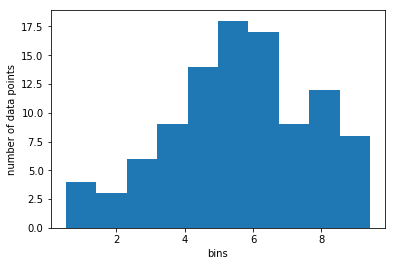

In [37]:
data = rnd.normal(loc=6, scale=2, size=100)
hist_data = plt.hist(data)
plt.xlabel('bins')
plt.ylabel('number of data points')
print('number of data points in each bin:', hist_data[0])
print('limits of the bins:', hist_data[1])

specify the number of bins with the `bins` keyword, and the range (minimum and maximum limits of the bins) with the `range` keyword

number of data points in each bin: [ 0.  2.  5.  8. 12. 23. 24.  9. 10.  6.  0.  1.]
limits of the bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


Text(0,0.5,'number of data points')

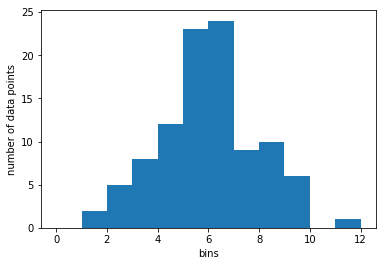

In [38]:
data = rnd.normal(loc=6, scale=2, size=100)
hist_data = plt.hist(data, bins=12, range=(0, 12))
print('number of data points in each bin:', hist_data[0])
print('limits of the bins:', hist_data[1])
plt.xlabel('bins')
plt.ylabel('number of data points')

### Probability density function

A line representing the pdf of the underlying normal distribution

number of data points in each bin: [0.02020202 0.02020202 0.03030303 0.09090909 0.18181818 0.17171717
 0.17171717 0.11111111 0.09090909 0.06060606 0.04040404 0.01010101]
limits of the bins: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


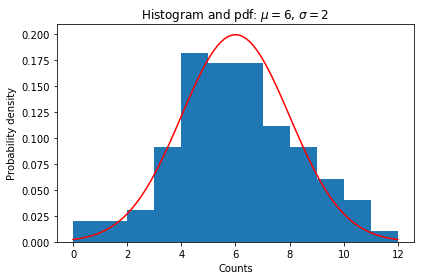

In [39]:
from scipy.stats import norm

mu = 6
sig = 2
N = 100

fig, ax = plt.subplots()

data = rnd.normal(loc=mu, scale=sig, size=N)
hist_data = ax.hist(data, bins=12, range=(0, 12), density = True)
print('number of data points in each bin:', hist_data[0])
print('limits of the bins:', hist_data[1])

# plotting pdf
x = np.linspace(0, 12, N)
y = norm.pdf(x, loc= mu, scale = sig)

ax.plot(x, y, 'r')
ax.set_xlabel('Counts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram and pdf: $\mu = 6$, $\sigma= 2$')
fig.tight_layout()
plt.show()

In [40]:
len(hist_data)

3

## **6. Percentiles**

like $D_{10}$, $D_{50}$ in GSD of particles,  the $25^{th}$ percentile marks a data point in the ordered data such that $25\%$ of the data is below this data point and thus $75\%$ is above this data point. 

Say that the $25^{th}$ percentile score on an exam was 85%, then $25\%$ of the candidates scored less than $85\%$ on the exam.

Interquartile range or IQR: 50% region around the median.

IQR runs from the $25^{th}$ empirical percentile to the $75^{th}$ empirical percentile.

The $95\%$ region, which runs from the $2.5^{th}$ empirical percentile to  the $97.5^{th}$ empirical percentile.

Percentiles of a dataset may be computed with the `percentile()` function in the numpy package. The first argument is the data, the second argument is a list of percentiles:

In [41]:
mean = 10
stdd = 2
N = 100
data = rnd.normal(loc = mean, scale = stdd, size = N)
lower, median, upper = np.percentile(data, [25, 50, 97.5])
lower_Q, upper_Q = np.percentile(data, [25, 75])

print('2.5 percentile: ', lower)
print('50 percentile: ', median)
print('97.5 percentile: ', upper)
print('95 percentile: ', upper - lower)
print('IQR percentile: ', upper_Q - lower_Q)

2.5 percentile:  8.237387670127148
50 percentile:  9.53506795982343
97.5 percentile:  13.33979212307559
95 percentile:  5.102404452948441
IQR percentile:  3.2138171438483294


### Theoretical percentiles of normal distribution



In [42]:
from scipy.stats import norm

norm_theory = norm.ppf([0.025, 0.5, 0.975], loc=10, scale=2)
print (norm_theory)

[ 6.08007203 10.         13.91992797]


## **7.Box and whisker plot**

## **8.Exercise**

Consider an election where one million (1,000,000) people will vote.

    490,000 people will vote for Mr. Arthur

    510,000 people will vote for Mr. Ben.

One day before the election, a private company, Octavius, conducts a poll among 1000 randomly chosen voters.

In [43]:
import numpy as np 
import numpy.random as rnd

rnd.seed(2)
people = np.zeros(1000000, dtype = 'int')
people[490000:] = 1
poll = rnd.choice(people,1000)

ArthurinHouse = len(poll[poll == 0])
print('Arthur in house: ', ArthurinHouse)

if ArthurinHouse > 500:
    print('Octavius predicts the wrong winner')
else:
    print('Octavius predicts the right winner')

Arthur in house:  508
Octavius predicts the wrong winner


#### 

Perform the poll 1000 times. Count how many times Arthur wins and how many times Ben wins.

Also, find the probability that Octavius will predict the correct winner based on these 1000 polls of 1000 people.

In [44]:
rnd.seed(2)

arthurWins = 0
benWins = 0
polls = 1000
for i in range(polls):
    people = np.zeros(1000000, dtype = 'int')
    people[490000:] = 1
    poll = rnd.choice(people,1000)
    ArthurinHouse = len(poll[poll == 0])


    if ArthurinHouse > 500:
        arthurWins += 1    
    else:
        benWins += 1
print("The probability that Octavius predicts correct winner: ", (benWins/polls))

The probability that Octavius predicts correct winner:  0.732
